<b>Machine Learning Exercise session: 07 October 2025</b>

# <b>Working with: Decision Trees</b>

Welcome to this week's exercise session. Today, we will learn about _Decision Trees_ (DT). This notebook will take you through:
- Translating intuition into practice
    - Setting decision boundaries
    - Calculating Impurities
    - How does the tree grow deeper
- Building Decision Tree classifiers from scratch, and using libraries
- Plotting decision boundaries, and showing explainability
- How features and hyperparameters can impact performance

The exercises are structured in 3 sections (Theory **T**; Application **A**; Exploration **E**). Optionally, here is a table to guide you through this sheet:

|To do|Exercise|
|----|--|
|First|T0-3, A0-2|
|Then|T4, A3-4|
|Last|E0-3|

Remember 
- It is good practice to use the Machine Learning python environment you made in *Week 1*.
- Solving these exercises is supposed to take longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, and read the documentation if needed. **We are happy to help if you are stuck**.
- *None of the exercises are mandatory, do your best to solve them! Every weekend solutions will be published!*
- *Remember to provide feedback on this Exercise sheet on the LearnIT page of the course so we can make better exercise sessions in the future!*

**Have fun!** 

# <b>Exploring theoretical background</b>

You are tasked to help MumboJumbo, a well known Minecraft player and content creator, to set up a machine that places torches which can adapt to any environment, using some clever machine learning techniques to decide when to place a torch.

In Minecraft, torches are a way to prevent enemies from spawning nearby (i.e. being loaded into the game-world). They appear in dark areas, either when it's night time or if a cave is nearby.

MumboJumbo scouted the world that you will be working in, and has given you some information that you can use to work with, as seen below. Equipped with your newly obtained knowledge from the Decision Tree lecture, you are prepared to take on this task.

# Exercise T0

Drawing **decision boundaries** by "hand":

Below you are given a dataset with 2 features and two classes:
- The distance to a cave, and the overall light level of that area
- Whether the area is worth placing a torch in, or not

You are also given a plot of this dataset.

Now:
1. Save the image locally on your machine, or use the DT_Image.png image file
2. Using any image editing application or website, draw a line splititting the plot using a single decision boundary with only 1 of the features
3. Save your new image containing the decision boundary, you will be using it later

<div style="display: flex; align-items: flex-start; gap: 20px;">
    <div><table>
      <tr><th>Distance to cave</th><th>Light level</th><th>Place torch</th></tr>
      <tr><td>0</td><td>2</td><td>0</td></tr>
      <tr><td>9</td><td>5</td><td>0</td></tr>
      <tr><td>6</td><td>8</td><td>1</td></tr>
      <tr><td>3</td><td>10</td><td>0</td></tr>
      <tr><td>12</td><td>13</td><td>1</td></tr>
    </table></div>
    <div><img src="DT_Image.png" alt="Example image" width="400"></div>
</div>


# Exercise T1


Computing the **Gini Impurity** and **Entropy**:

Given the dataset from the previous exerecise, and your carefully chosen decision boundary
1. For both regions, calculate their Gini Impurity and Entropy
2. Calculate the overall quality of the split using their Weighted Average and by calculating the Information Gain

**It is recommended that you do the calculations here for ease of use in the future, but you can do it on paper if you so choose.**

**The equations for the required calculations can be found in the lecture slides**

In [ ]:
# Your solution goes here

""" 
Because
Gini:
2/3*1/3+1/3*2/3=2/9+2/9=4/9

Entropy:


For calculating split impurity we compute the weights as the number of points in a given region divided by
the total nunber of points. And mulitply it by our impurity measure(Gini or Entropy)
"""

# Exercise T2

Now doing it **again**, going deeper:

Given the previous dataset and the image you have split:
1. Draw a second decision boundary using the other feature
2. Save the image
3. Calculate each regions Gini Impurity or Entropy
4. Calculate the overall quality of the split using their weighted average or by calculating the Information gain

Do you believe you will obtain better results in the end using more splits?

In [ ]:
# Your solution goes here

""" 
3 regions

Gini region1: 0, gini region2: 0, Gini region 3: 0


Population Gini: 12/25

Information gain using gini
12/25-0=12/25 = 0.48

Region ginis is 0, because all regions are pure(all points are the same class in each region)



"""

# Exercise T3

Making a **change**:

Given the previous dataset and the image you have split twice now:
1. Move any of the decision boundaries by some amount so that at least 1 data point falls into a new region
2. Calculate their impurity, using any of the two previous methods, and then the overall quality of the split

Has it made any meaningful difference?

In [ ]:
# Your solution goes here

# Exercise T4

Discuss in pairs:

- Is two splits enough, too much, or too little? Why?
- What would happen if you try splitting more?

# <b>Applying what you learned</b>

Now that you got some intuition of what results you are expecting from the above exercises, it is time to implement your very own Decision Tree classifier and see if it matches your intuition!

### **Documentation**

Some of the libraries that is expected to be used moving forward:
- numpy : https://numpy.org/doc/stable/index
- pandas : https://pandas.pydata.org/pandas-docs/stable/
- matplotlib.pyplot : https://matplotlib.org/stable/tutorials/pyplot.html
- scipy.stats : https://docs.scipy.org/doc/scipy/tutorial/stats.html
- sklearn : https://sklearn.org/stable/getting_started.html
  - datasets : https://scikit-learn.org/stable/api/sklearn.datasets.html
  - tree : https://scikit-learn.org/stable/api/sklearn.tree
  - model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html
  - metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html

**It is recommended that you have these pages available for you to read at any moment, rather than scrolling up and down all the time. In a real working environment your hand wont be held, and you will be responsible to find the relevant documentation.**

# Exercise A0

The first step is to **start simple**

To make things easy moving on, implement a few relevant functions for a given region:
- Implement a function for calculating Gini Impurity and/or Entropy
- Implement a function for calculating the Weighted Impurity and/or Information Gain

Don't be worried if you have to come back and add more functions or modify the implemented functions later on as we expand on the difficulty of tasks.

In [13]:
# Your solution goes here
import numpy as np
#Take list of proportion of classes in region
def Gini(proportion):
    gini = 0
    for k in proportion:
        gini+=k * (1-k)
    return gini
print(Gini([1/3,2/3]))
def Entropy(proportion):
    entropy = 0
    for k in proportion:
        entropy += -k*np.log2(k)
    return entropy
print(Entropy([2/3,1/3]))

def split(nR1, nR2, nP, gini =[], entropy = []):
    split = 0
    if np.sum(gini)>0:
        split = (nR1/nP) * gini[0] + (nR2/nP) * gini[1]
    if np.sum(entropy)>0:
        split = (nR1/nP) * entropy[0] + (nR2/nP) * entropy[1]
    return split

region = 2
gini = [Gini([2/3,1/3]),Gini([1])]
split(3,2,5,gini)



    

0.4444444444444445
0.9182958340544896


0.26666666666666666

# Exercise A1

Your first **Decision Tree** from scratch

It is time to find the first decision boundary:
- Using loops, iterate over the dataset, taking in count one feature at each loop
- Calculate the impurity at each step
- Save the best split considering which feature gave the best results and at which datapoint, minimizing impurity
- Plot the dataset with the best split. *(You may want to add this as a function to the block above to have things neatly organized once the tasks get more complex)*

Remember that the Decision Tree model first evaluates the best split given each feature, before any further splits are made.

Does it match your initial drawing from T0, and your intuition? Feel free to discuss in pairs.

In [ ]:
# Your solution goes here
import pandas as pd

# Create the dataset as a dictionary
data = {
    "Distance to cave": [0, 9, 6, 3, 12],
    "Light level": [2, 5, 8, 10, 13],
    "Place torch": [0, 0, 1, 0, 1]
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display it
print(df)

torch = [0, 0, 1, 0, 1]
light = [2, 5, 8, 10, 13]
cave = [0, 9, 6, 3, 12]

for i in range(len(torch)):
    

# Exercise A2

Going one **depth** lower

Now that one split is made, it is time to create the second split:
- Using loops again, iterate over the each region made from the split, taking in count all features.
- Calculate the impurity at each step
- Save the best split
- Plot the dataset with the two splits

Remember that the split happens per region, so it has to be calculated for both regions, and for all features.

In [ ]:
# Your solution goes here

# Exercise A3

Time to **scale up** and look at libraries!

Now that you have the foundation on how to split a dataset and calculate impurity, it is time to implement a Decision Tree classifier on a larger dataset using the corresponding libraies:
- Load the dataset into memory from the code block provided below and inspect the plot created
- Split the dataset into training and validation sets
- Using `Feature1` and `Feature2` as your features, with `Label` as your label, train a Decision Tree classifier
- Evaluate the result and performance of your classifier
- Plot the corresponding decision boundary.


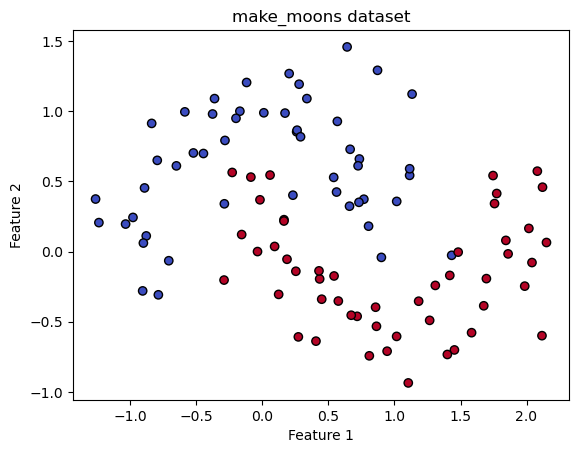

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("make_moons dataset")
plt.show()

In [ ]:
# Your solution goes here

# Exercise A4

Back to **scratch**

Instead of using the library implementation, it is time to put all your knowledge to test and code a Decision Tree classifier from scratch on the `make_moons` dataset.

You are already equipped with the knowledge of how the data is loaded, how the splits are made, and how you can evaluate the performance of models (from past lectures).

For this exercise, you will be focusing on developing a recursive tree builder, so that your your splits are automatically made until a stopping condition is met.

Your tasks are:
- Load the dataset
- Implement a recursive tree builder with nodes, which in essence has:
    - An node object that holds information about what feature it is split on, the treshold, what its left and right children are, and what its label is
    - A function that recursively splits the dataset and builds these nodes, until a stopping condition is met (e.g. until a region is pure or a certain depth is reached)
- Run the tree builder on the training dataset
- Test it on the validation dataset
- Plot the results and evaluate it. How closely does it match the library implementation?

In [ ]:
# Your solution goes here

# <b>Exploring what you learned</b>

# Exercise E0

Showcasing explainability:
- Use export_text and plot_tree to extract and show a simple viauslization of the classifier

In [ ]:
# Your solution goes here

# Exercise E1

Checking some properties of Decision Trees:
- Show that Decision Trees are invariant to monotonic feature scaling
- Verify the same splits before/after StandardScaler/MinMaxScaler

**Note**: scaling affects plotting but not split order.

In [ ]:
# Your solution goes here

# Exercise E2

How much does the data influence the results:
- Train multiple trees with different train/test splits with different seeds (or different samples)
- Overlay their boundaries to show variance

**Note**: Foreshadowing to why ensemble methods are powerful.

In [ ]:
# Your solution goes here